# 02. PCA (Principal component analysis)
---
* 날짜:
* 이름:

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
```

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 개념정리

---
### **단계별 구현**
---

<h5><center>$\mathbb{X}$</center>
\begin{pmatrix}
 -2& 4\\ 
 -1& 2\\ 
 0& 0\\ 
 1& -1\\ 
 2& -8
\end{pmatrix}</h5>

In [40]:
X= np.array([[-2,-1,0,1,2],[4,2,0,-1,-8]],dtype=float).swapaxes(0,1)
print(X,X.shape)

[[-2.  4.]
 [-1.  2.]
 [ 0.  0.]
 [ 1. -1.]
 [ 2. -8.]] (5, 2)


#### **1. Mean centering**

In [41]:
X_col1=X[:,0]
print(X_col1)
X[:,0] = X[:,0]-np.mean(X[:,0])
X[:,1] = X[:,1]-np.mean(X[:,1])
print(X,X.shape)

[-2. -1.  0.  1.  2.]
[[-2.   4.6]
 [-1.   2.6]
 [ 0.   0.6]
 [ 1.  -0.4]
 [ 2.  -7.4]] (5, 2)


#### **2. 공분산행렬 구하기**

<h1><center>$ COV(X) = \frac{1}{(N-1)}X^TX$</center></h1>

In [43]:
def cov(X):
  N= len(X)
  return (1/(N-1)) * np.matmul(X.T,X)
cov_X = cov(X)
print(X)
print(cov_X, cov_X.shape)

[[-2.   4.6]
 [-1.   2.6]
 [ 0.   0.6]
 [ 1.  -0.4]
 [ 2.  -7.4]]
[[ 2.5  -6.75]
 [-6.75 20.8 ]] (2, 2)


#### **3. eigenvalue, eigenvector 구하기**

In [44]:
eigen_val, eigen_vec = np.linalg.eig(cov_X)
print(eigen_val,eigen_val.shape)
print(eigen_vec,eigen_vec.shape)

[ 0.27964381 23.02035619] (2,)
[[-0.9499274   0.31247069]
 [-0.31247069 -0.9499274 ]] (2, 2)


#### **4. eigenvalue를 이용해 주성분 축 구하기**

In [46]:
eigen_val_1st = np.argmax(eigen_val)
print(eigen_val_1st)

1


#### **5. eigenvector을 통해 주성분 구하기**

In [64]:
p_1st=eigen_vec[:,eigen_val_1st]
p_2nd=eigen_vec[:,0]

#### **6. 모델 완성**

In [65]:
Z = np.matmul(X, p_1st)
print(Z,Z.shape)

[-4.99460743 -2.78228193 -0.56995644  0.69244165  7.65440415] (5,)


---
### **결과분석**
---

#### **직선의 방정식**

In [66]:
x=np.arange(-5,5)
y=(p_1st[1]/p_1st[0])*x

#### **시각화**

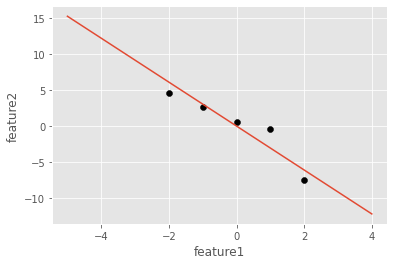

In [67]:
plt.plot(x,y)
plt.scatter(X[:,0],X[:,1],c='black')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

#### **성분별 분산 비교**

* 주성분 1

In [68]:
p_1st

array([ 0.31247069, -0.9499274 ])

* 주성분 1로 투영한 Z1

In [69]:
Z1  = np.matmul(X,p_1st)
print(Z1,Z1.shape)

[-4.99460743 -2.78228193 -0.56995644  0.69244165  7.65440415] (5,)


* Z1의 분산

In [70]:
np.var(Z1)

18.416284955958673

* 주성분 2

In [71]:
p_2nd

array([-0.9499274 , -0.31247069])

* 주성분 2로 투영한 Z2

In [72]:
Z2 =np.matmul(X,p_2nd)
print(Z2,Z2.shape)

[ 0.46248961  0.13750359 -0.18748242 -0.82493912  0.41242834] (5,)


* Z2의 분산

In [73]:
np.var(Z2)

0.22371504404133136

* 시각화

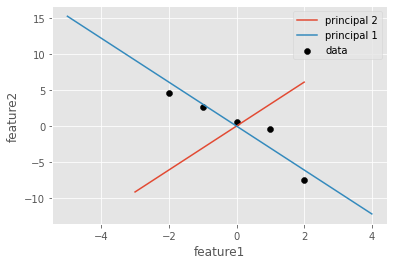

In [76]:
x2=np.arange(-3,3)
y2 =(p_2nd[0]/p_2nd[1])*x2
plt.plot(x2,y2)
plt.plot(x,y)
plt.scatter(X[:,0],X[:,1],c='k')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.legend(["principal 2","principal 1","data"])
plt.show()

---
### **sklearn 을 이용한 구현**
---

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA

* 입력 인수:	
  * `n_components` : 정수

* 메서드:	
  * `fit_transform()` : 특징행렬을 낮은 차원의 근사행렬로 변환
  * `inverse_transform()` : 변환된 근사행렬을 원래의 차원으로 복귀

* 속성:	
 * `mean_` : 평균 벡터
 * `components_` : 주성분 벡터

In [79]:
from sklearn import decomposition

In [87]:
pca = decomposition.PCA(n_components=2)    #n_components= 몇차원으로 축소할거냐
Z = pca.fit_transform(X)
print(Z,Z.shape)

[[-4.99460743 -0.46248961]
 [-2.78228193 -0.13750359]
 [-0.56995644  0.18748242]
 [ 0.69244165  0.82493912]
 [ 7.65440415 -0.41242834]] (5, 2)


#### **성분별 분산 비교**

* 주성분 1

* 주성분 1로 투영한 Z1

* Z1의 분산

In [89]:
np.var(Z[:,0])

18.416284955958673

* 주성분 2

* 주성분 2로 투영한 Z2

* Z2의 분산

In [88]:
np.var(Z[:,1])

0.22371504404133122

* 시각화

In [90]:
pca.components_

array([[ 0.31247069, -0.9499274 ],
       [ 0.9499274 ,  0.31247069]])

---
### **실습**
---

#### **Data**


![](https://t1.daumcdn.net/tistoryfile/fs13/27_tistory_2009_11_29_22_54_4b127d29159f6?x-content-disposition=inline)

`Iris` 데이터셋

* caseno: 일련번호 (1부터 150)  
* Sepal Length: 꽃받침의 길이 
* Sepal Width: 꽃받침의 너비  
* Petal Length: 꽃잎의 길이  
* Petal Width: 꽃잎의 너비    
* Species: 꽃의 종류 .  
* Label: setosa / versicolor / virginica 의 3종류




* `sklearn`의 `datasets` 에서 `iris` 데이터셋 불러오기

In [118]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

* iris 데이터를 x, y 로 분류하기

In [120]:
x ,y = iris['data'],iris['target']
print(x.shape,y.shape)
print(iris['feature_names'])
print(iris['target_names'])

(150, 4) (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


* 예측값 히스토그램 그리기

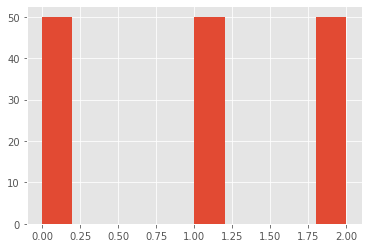

In [121]:
plt.hist(y)
plt.show()

####**PCA 학습**

In [122]:
pca = decomposition.PCA(n_components=2)
z= pca.fit_transform(x)
print(z.shape)

(150, 2)


* 결과 시각화

['setosa' 'versicolor' 'virginica']


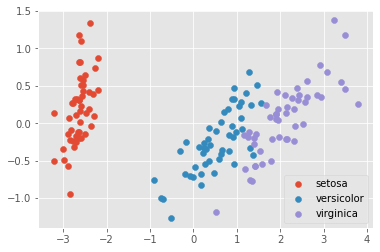

In [123]:
label =  iris["target_names"]
print(label)
for i,l in enumerate(label):
  plt.scatter(z[:,0][y==i],z[:,1][y==i],label=l)
plt.legend()
plt.show()

## **과제**


---
### **과제01**
---
`iris` 데이터에 다양한 deomposition 알고리즘 사용해보기

#### **Kernel Principal Component Analysis (kPCA)**

* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA

* 알고리즘 사용 및 시각화

(150, 2)
['setosa' 'versicolor' 'virginica']


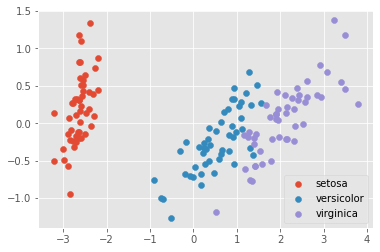

In [127]:

from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components=2, kernel='linear')
z= pca.fit_transform(x)
print(z.shape)

label =  iris["target_names"]
print(label)
for i,l in enumerate(label):
  plt.scatter(z[:,0][y==i],z[:,1][y==i],label=l)
plt.legend()
plt.show()

* **알고리즘 소개**
* .주성분 분석(主成分分析, Principal component analysis; PCA)은 고차원의 데이터를 저차원의 데이터로 환원시키는 기법을 말한다. 이 때 서로 연관 가능성이 있는 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간(주성분)의 표본으로 변환하기 위해 직교 변환을 사용한다. 데이터를 한개의 축으로 사상시켰을 때 그 분산이 가장 커지는 축을 첫 번째 주성분, 두 번째로 커지는 축을 두 번째 주성분으로 놓이도록 새로운 좌표계로 데이터를 선형 변환한다. 이와 같이 표본의 차이를 가장 잘 나타내는 성분들로 분해함으로써 데이터 분석에 여러가지 이점을 제공한다. 이 변환은 첫째 주성분이 가장 큰 분산을 가지고, 이후의 주성분들은 이전의 주성분들과 직교한다는 제약 아래에 가장 큰 분산을 갖고 있다는 식으로 정의되어있다. 중요한 성분들은 공분산 행렬의 고유 벡터이기 때문에 직교하게 된다.


* .비선형 차원 축소를 위한 최신 방법들 중 대다수는 주성분분석과 K-평균 알고리즘에서 이론적/알고리즘적 기원을 찾을 수 있다. Pearson의 본래 아이디어는 데이터 점들에 "가장 잘 들어맞는" 직선(혹은 평면)을 찾는 것이었다. 주곡면과 변형체[31]는 주성분분석을 일반화하고, 주성분분석의 기하학적 해석을 확장하는데 자연스러운 기하학적 뼈대가 된다. 엘라스틱맵(Elestic map)알고리즘과 추측지분석(Principal geodesic analysis)를 참고해보자. 주성분분석의 또 다른 일반화는 커널 주성분분석이며, 정부호(positive definite) 커널을 사용하는 커널 힐버트공간에서 주성분분석을 수행하는 것에 해당한다.

#### **Non-negative matrix factorization (NMF or NNMF)**

* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html?highlight=nmf#sklearn.decomposition.NMF

* 알고리즘 사용 및 시각화

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


(150, 2)
['setosa' 'versicolor' 'virginica']


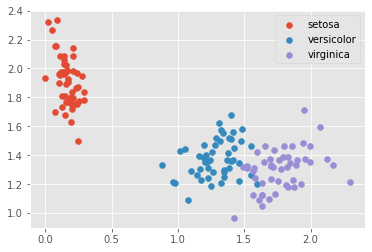

In [129]:
from sklearn.decomposition import NMF

pca = NMF(n_components=2, init='random', random_state=0)
z= pca.fit_transform(x)
print(z.shape)

label =  iris["target_names"]
print(label)
for i,l in enumerate(label):
  plt.scatter(z[:,0][y==i],z[:,1][y==i],label=l)
plt.legend()
plt.show()

* **알고리즘 소개**
  * .음수 미포함 행렬 분해(Non-negative matrix factorization, NMF)는 음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘이다.[1] 행렬이 음수를 포함하지 않는 성질은 분해 결과 행렬을 찾기 쉽게 만든다. 일반적으로 행렬 분해는 정확한 해가 없기 때문에 이 알고리즘은 대략적인 해를 구하게 된다. 음수 미포함 행렬 분해는 컴퓨터 시각 처리, 문서 분류, 음파 분석, 계량분석화학, 추천 시스템 등에 쓰인다.


---
### **과제02**
---

다음 데이터셋 중 하나를 선택해 불러옵니다.
* 펭귄 데이터
* 와인 데이터
* 축구 예측 데이터

간단한 전처리 후 PCA를 이용해 차원축소하고, 이를 2차원 평면에 시각화 하세요

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

plt.rcParams["font.size"] = 13
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
from google.colab import files
files.upload()

Saving bike_sharing_train.csv to bike_sharing_train.csv


{'bike_sharing_train.csv': b'datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count\n2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16\n2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40\n2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32\n2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13\n2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1\n2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.0032,0,1,1\n2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0,2,0,2\n2011-01-01 07:00:00,1,0,0,1,8.2,12.88,86,0,1,2,3\n2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0,1,7,8\n2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0,8,6,14\n2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36\n2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56\n2011-01-01 12:00:00,1,0,0,1,17.22,21.21,77,19.0012,29,55,84\n2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94\n2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106\n2011-01-01 15:00:00,1,0,0,2,18.

In [135]:
def preproces_bike(df):
  #필요없는 속성제거
  drop_list = ['casual','registered']
  df_pre = df.drop(drop_list,axis=1)

  #결측값 중앙값으로 처리
  mask_wind =  df_pre['windspeed'] == 0.0
  df_pre.loc[mask_wind,'windspeed'] = df_pre['windspeed'].median()

  #날짜를 제거하고 시간만 남기는 처리
  for i in range(len(df_pre['datetime'])):
    if len(df_pre['datetime'][i])> 4:
      (df_pre['datetime'][i])=int(df_pre['datetime'][i][-8:-6])

  #이산화 -시간별로 구간을 만드는 처리(0-4시:0 / 4-8시:1 / 8-12시:2 / 12-16시:3 /16-20시:4 /20-24:5)
  bin = [-1,4,8,12,16,20,25]
  group_name = [0,1,2,3,4,5]
  df_pre['datetime']=pd.cut(df_pre['datetime'], bins=bin, labels=group_name)

  return df_pre

In [136]:
df_train =pd.read_csv("bike_sharing_train.csv")
train=preproces_bike(df_train)
train.head()
X=train.drop('count',axis=1)
X_np=X.to_numpy()
Y=train['count']
Y_np=Y.to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


No handles with labels found to put in legend.


(10886, 2)


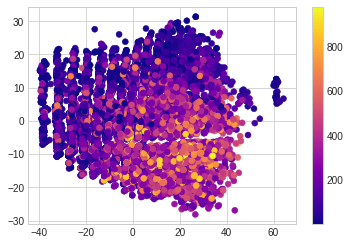

In [147]:
pca = decomposition.PCA(n_components=2)
z= pca.fit_transform(X_np)
print(z.shape)
x = z[:,0]
y = z[:,1]
plt.scatter(x, y, c=Y_np ,cmap='plasma')
plt.colorbar()
plt.legend()
plt.show()